In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
url = "https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/titanic_train.csv"
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.sample(10, random_state=2024)  #reproducibilidad 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S
719,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.7750,NaN,S
637,638,0,2,"Collyer, Mr. Harvey",male,31.0,1,1,C.A. 31921,26.2500,NaN,S
733,734,0,2,"Berriman, Mr. William John",male,23.0,0,0,28425,13.0000,NaN,S
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
475,476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5000,NaN,S


In [11]:
# Verificar si hay duplicados
df = df.drop_duplicates()
df.shape

(891, 12)

In [15]:
# Columnas irrelevantes para el análisis
df["PassengerId"].value_counts()

PassengerId
891    1
1      1
2      1
3      1
4      1
      ..
16     1
15     1
14     1
13     1
12     1
Name: count, Length: 891, dtype: int64

In [21]:
df["Embarked"].value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [20]:
df["Ticket"].value_counts(dropna=False)

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

In [22]:
# Passengerid, name, ticket vamos a eliminar Transformar data previo
df = df.drop(["PassengerId", "Name", "Ticket"], axis=1) # ¿por qué axis 1?

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [33]:
# Ahora hay que transformar lo que falta
# Tenemos datos numéricos, Categorías (texto), Texto
# Survived es categórico porque no tiene sentido hacer la desviación estándar, etc
# Pclass también es categórico
# Tomar las columnas y aplicar las transformaciones en base al análisis que quiero hacer
# Transformar datos categóricos

df["Survived"] = pd.Categorical(df["Survived"])
df["Pclass"] = pd.Categorical(df["Pclass"])
df["Sex"] = pd.Categorical(df["Sex"])
df["Embarked"] = pd.Categorical(df["Embarked"])
df["Cabin"] = pd.Categorical(df["Cabin"])
df["Age"] = df["Age"].fillna(-1).astype(np.int16, errors="ignore") # fill na para cambiar el na por -1

In [36]:
df[df["Age"]== -1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
5,0,3,male,-1,0,0,8.4583,NaN,Q
17,1,2,male,-1,0,0,13.0000,NaN,S
19,1,3,female,-1,0,0,7.2250,NaN,C
26,0,3,male,-1,0,0,7.2250,NaN,C
28,1,3,female,-1,0,0,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...
859,0,3,male,-1,0,0,7.2292,NaN,C
863,0,3,female,-1,8,2,69.5500,NaN,S
868,0,3,male,-1,0,0,9.5000,NaN,S
878,0,3,male,-1,0,0,7.8958,NaN,S


In [37]:
df["Age"] = df["Age"].apply(lambda x: x if x >= 0 else np.nan)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Cabin     204 non-null    category
 8   Embarked  889 non-null    category
dtypes: category(5), float64(2), int64(2)
memory usage: 38.9 KB


In [40]:
# Ya está todo transformado excepto Age
df.describe(include= np.number).T

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.679272,14.536483,0.0,20.0000,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.0,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.0,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [42]:
# Si la desviación estándar es mucho mayor que la media quiere decir que tenemos datos muy dispersos
df.describe(include="category").T

,count,unique,top,freq
Survived,891,2,0,549
Pclass,891,3,3,491
Sex,891,2,male,577
Cabin,204,147,G6,4
Embarked,889,3,S,644


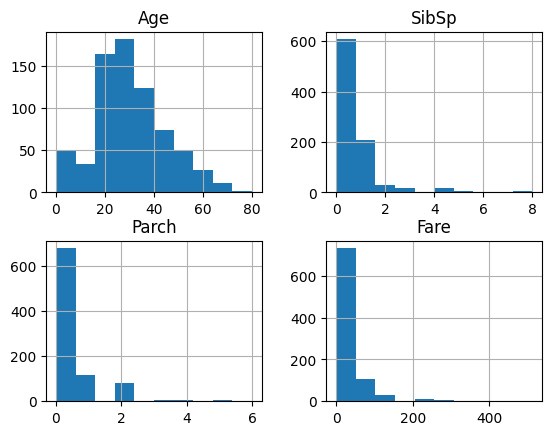

In [44]:
# Análisis univariado columna por columna de números y de categorías, en este caso variables numéricas
df.select_dtypes(include=np.number).hist()
plt.show()


<Axes: xlabel='Fare'>

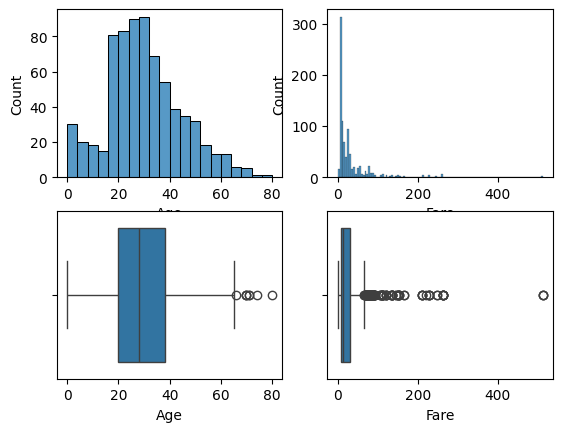

In [45]:
# Edad y Fare
fig, axis = plt.subplots(2,2)
sns.histplot(ax= axis[0,0], data=df, x="Age")
sns.boxplot(ax=axis[1,0], data=df, x="Age")
sns.histplot(ax= axis[0,1], data=df, x="Fare")
sns.boxplot(ax=axis[1,1], data=df, x="Fare")

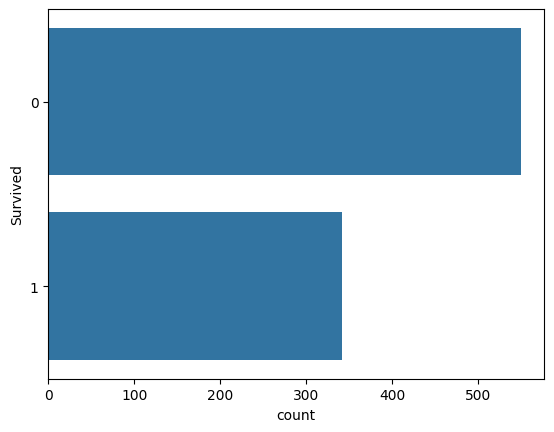

In [47]:
# Análisis univariado categórico
sns.countplot(data=df, y="Survived")
plt.show()

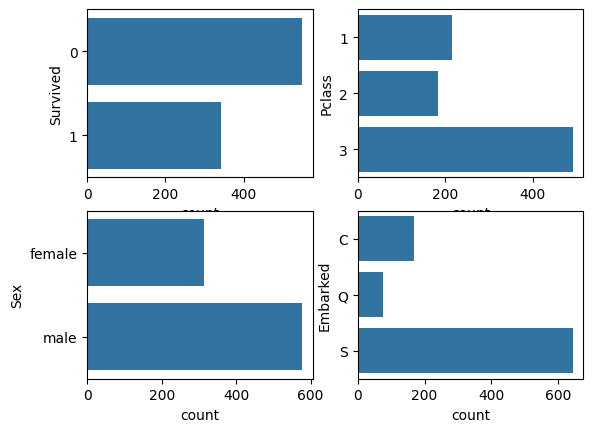

In [49]:
fig, axis = plt.subplots(2,2)
sns.countplot(ax= axis[0,0], data=df, y="Survived")
sns.countplot(ax= axis[0,1], data=df, y="Pclass")
sns.countplot(ax= axis[1,0], data=df, y="Sex")
sns.countplot(ax= axis[1,1], data=df, y="Embarked")

plt.show()

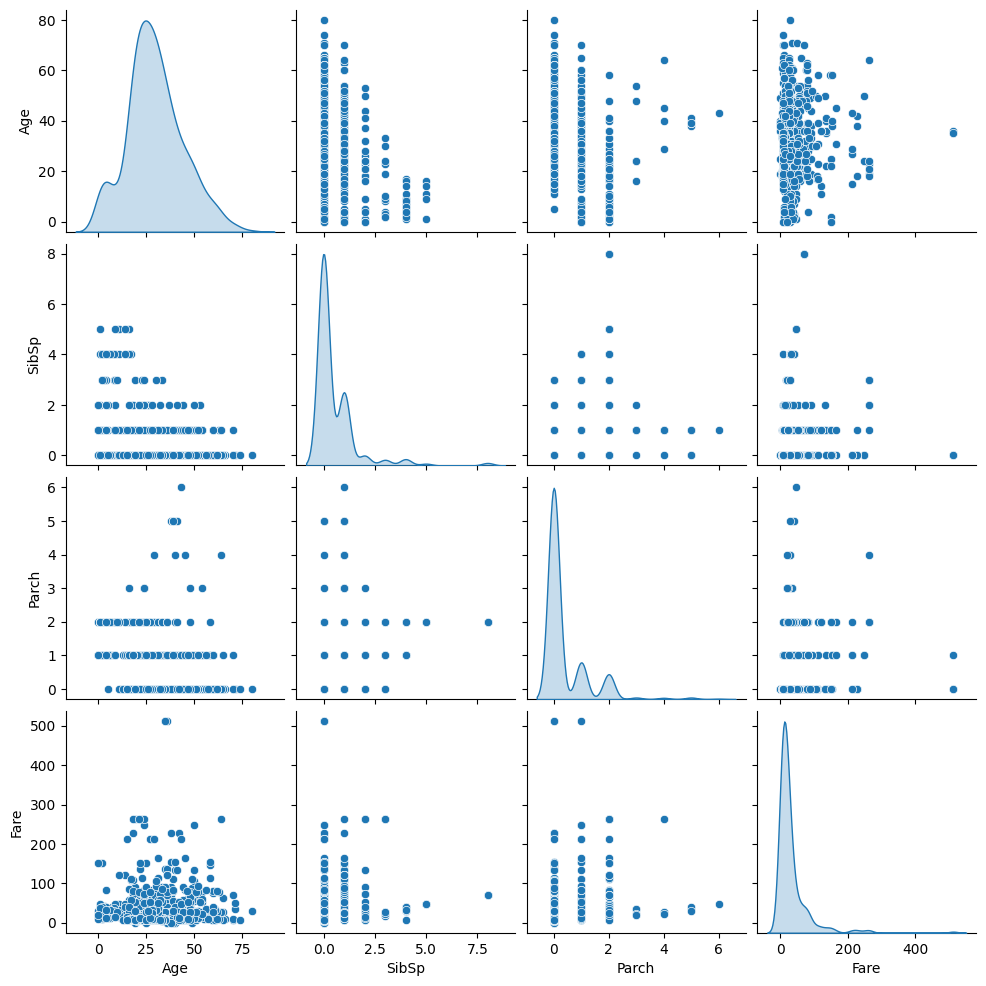

In [52]:
# Análisis bivariado numérico vs numérico, categórico vs categórico, numérico vs categórico
sns.pairplot(data= df.select_dtypes(include=np.number), diag_kind="kde")
plt.show()

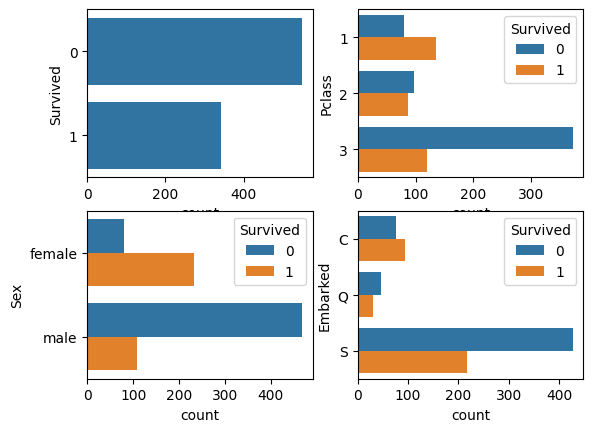

In [53]:
# Análisis bivariado categórico vs categórico
# Necesito una variable de control Survived vs Sex y Embarked vs Survived
fig, axis = plt.subplots(2,2)
sns.countplot(ax= axis[0,0], data=df, y="Survived")
sns.countplot(ax= axis[0,1], data=df, y="Pclass", hue="Survived")
sns.countplot(ax= axis[1,0], data=df, y="Sex", hue="Survived")
sns.countplot(ax= axis[1,1], data=df, y="Embarked", hue="Survived")

plt.show()

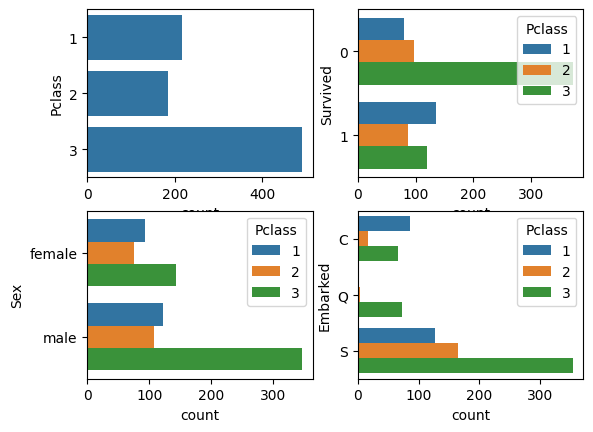

In [54]:
# Valor de control clase

fig, axis = plt.subplots(2,2)
sns.countplot(ax= axis[0,0], data=df, y="Pclass")
sns.countplot(ax= axis[0,1], data=df, y="Survived", hue="Pclass")
sns.countplot(ax= axis[1,0], data=df, y="Sex", hue="Pclass")
sns.countplot(ax= axis[1,1], data=df, y="Embarked", hue="Pclass")

plt.show()

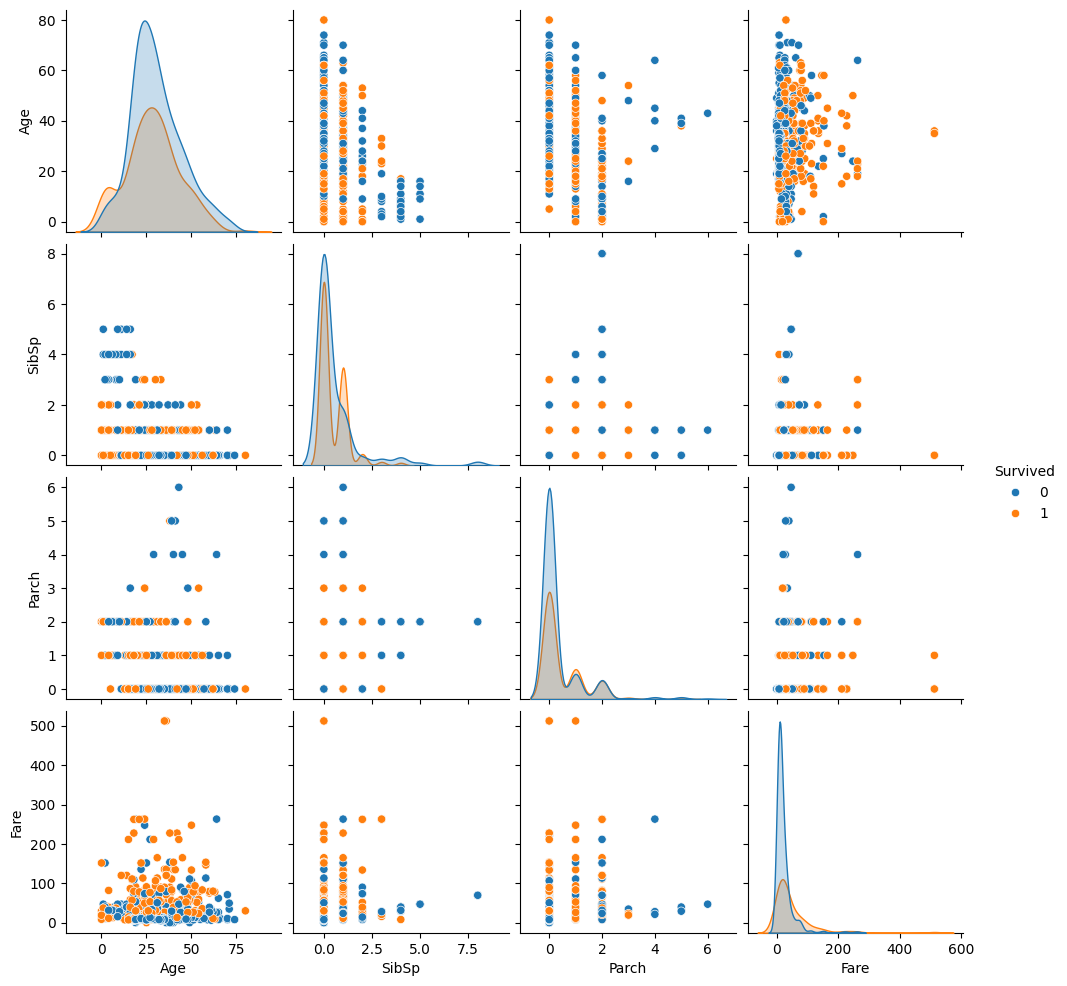

In [55]:
# Análisis bivariado numérico vs categórico

sns.pairplot(data= df, hue="Survived", diag_kind="kde")
plt.show()


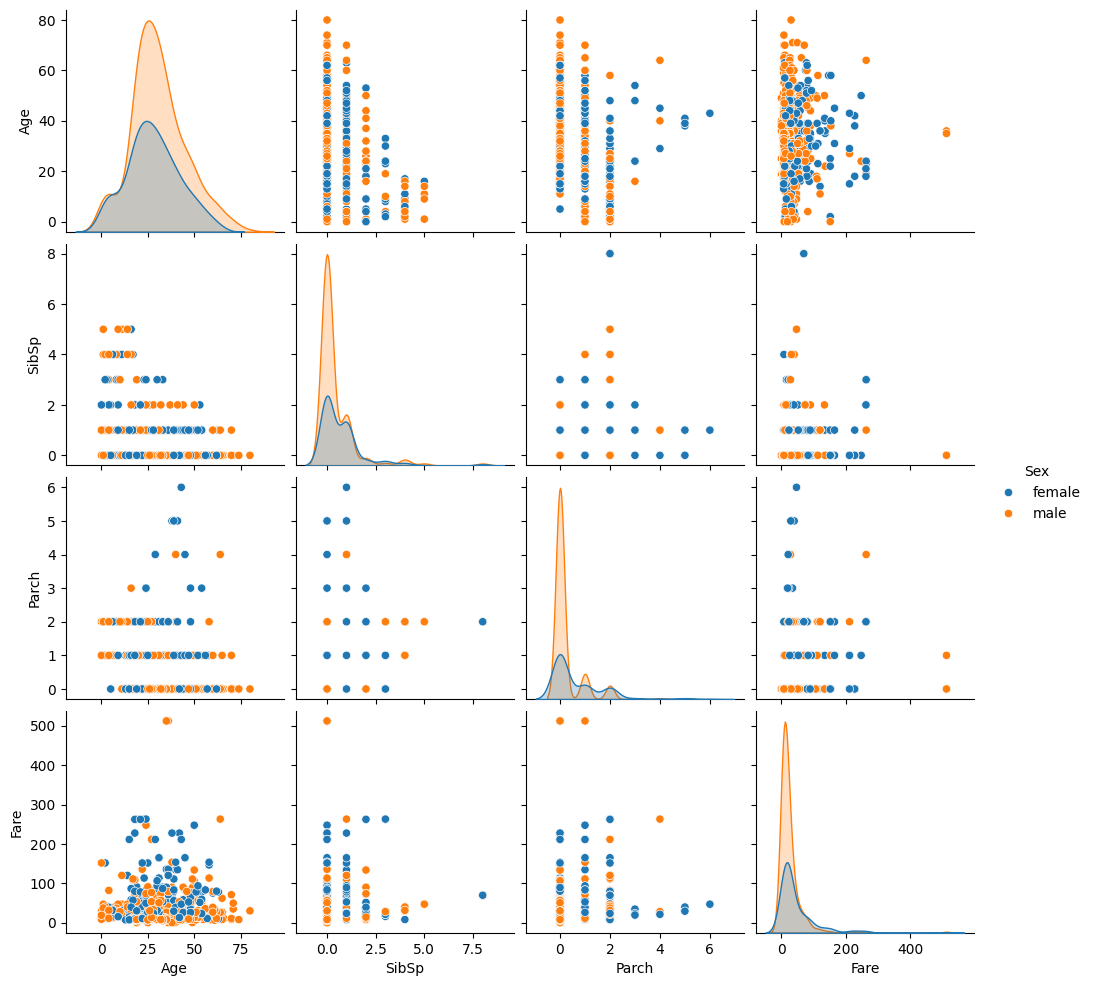

In [56]:
sns.pairplot(data= df, hue="Sex", diag_kind="kde")
plt.show()


In [57]:
df.select_dtypes(include=np.number).corr()  #Mide la correlación linear Pearson -1 a 1 Cuando una se acerca a 1 es una
# relación lineal positiva 
# cuando se acerca a -1 es una relación lineal negativa
# Cuando tiende a 0 es que no es relación lineal 



,Age,SibSp,Parch,Fare
Age,1.000000,-0.307947,-0.189307,0.096288
SibSp,-0.307947,1.000000,0.414838,0.159651
Parch,-0.189307,0.414838,1.000000,0.216225
Fare,0.096288,0.159651,0.216225,1.000000


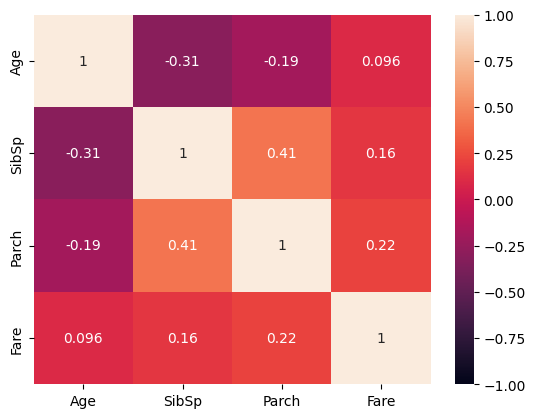

In [61]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [76]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [77]:
df = pd.DataFrame(X)
df["target"] = y
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [79]:
df.sample(10, random_state=2024) 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
112,52,1,1,118,186,0,2,190,0,0.0,2,0.0,6.0,0
180,48,1,4,124,274,0,2,166,0,0.5,2,0.0,7.0,3
33,59,1,4,135,234,0,0,161,0,0.5,2,0.0,7.0,0
217,46,0,4,138,243,0,2,152,1,0.0,2,0.0,3.0,0
185,63,0,2,140,195,0,0,179,0,0.0,1,2.0,3.0,0
295,41,1,2,120,157,0,0,182,0,0.0,1,0.0,3.0,0
153,55,1,4,160,289,0,2,145,1,0.8,2,1.0,7.0,4
108,61,1,4,120,260,0,0,140,1,3.6,2,1.0,7.0,2
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
169,45,0,2,112,160,0,0,138,0,0.0,2,0.0,3.0,0


In [80]:
# Verificar si hay duplicados
df = df.drop_duplicates()
df.shape

(303, 14)

In [81]:
df["oldpeak"].value_counts()

oldpeak
0.0    99
1.2    17
0.6    14
1.0    14
0.8    13
1.4    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.6     6
2.8     6
3.0     5
1.5     5
1.9     5
0.5     5
3.6     4
2.2     4
0.9     3
0.3     3
4.0     3
2.4     3
3.4     3
2.3     2
1.1     2
3.2     2
2.5     2
4.2     2
3.5     1
3.1     1
1.3     1
2.9     1
5.6     1
6.2     1
2.1     1
3.8     1
0.7     1
4.4     1
Name: count, dtype: int64

In [82]:
df["sex"] = pd.Categorical(df["sex"])
df["cp"] = pd.Categorical(df["cp"])
df["fbs"] = pd.Categorical(df["fbs"])
df["restecg"] = pd.Categorical(df["restecg"])
df["exang"] = pd.Categorical(df["exang"])
df["slope"] = pd.Categorical(df["slope"])
df["thal"] = pd.Categorical(df["thal"])

In [83]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    category
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    category
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    category
 11  ca        299 non-null    float64 
 12  thal      301 non-null    category
 13  target    303 non-null    int64   
dtypes: category(7), float64(2), int64(5)
memory usage: 19.7 KB


In [84]:
df.describe(include= np.number).T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
ca,299.0,0.672241,0.937438,0.0,0.0,0.0,1.0,3.0
target,303.0,0.937294,1.228536,0.0,0.0,0.0,2.0,4.0
